In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [ ]:
!unzip /content/drive/MyDrive/deeplearning/datafordoan.zip -d .

Streaming output truncated to the last 5000 lines.
  inflating: ./datafordemo/test/bike/022.jpg  
  inflating: ./datafordemo/test/bike/023.jpg  
  inflating: ./datafordemo/test/bike/024.jpg  
  inflating: ./datafordemo/test/bike/025.jpg  
  inflating: ./datafordemo/test/bike/026.jpg  
  inflating: ./datafordemo/test/bike/027.jpg  
  inflating: ./datafordemo/test/bike/028.jpg  
  inflating: ./datafordemo/test/bike/029.jpg  
  inflating: ./datafordemo/test/bike/030.jpg  
  inflating: ./datafordemo/test/bike/031.jpg  
  inflating: ./datafordemo/test/bike/032.jpg  
  inflating: ./datafordemo/test/bike/033.jpg  
  inflating: ./datafordemo/test/bike/034.jpg  
  inflating: ./datafordemo/test/bike/035.jpg  
  inflating: ./datafordemo/test/bike/036.jpg  
  inflating: ./datafordemo/test/bike/037.jpg  
  inflating: ./datafordemo/test/bike/038.jpg  
  inflating: ./datafordemo/test/bike/039.jpg  
  inflating: ./datafordemo/test/bike/040.jpg  
  inflating: ./datafordemo/test/bike/041.jpg  
  inflati

In [ ]:
# Đường dẫn dữ liệu
BASE_PATH = "/content/datafordemo"
TRAIN_PATH = os.path.join(BASE_PATH, "train")
VALID_PATH = os.path.join(BASE_PATH, "valid")
TEST_PATH = os.path.join(BASE_PATH, "test")
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32
NUM_CLASSES = 5

In [ ]:
# Tạo dữ liệu train, validation và test từ đường dẫn
train_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

valid_datagen = ImageDataGenerator(rescale=1. / 255)
valid_generator = valid_datagen.flow_from_directory(
    VALID_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 3502 images belonging to 5 classes.
Found 1001 images belonging to 5 classes.
Found 502 images belonging to 5 classes.


In [ ]:
# Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
# Compile mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Huấn luyện mô hình

history = model.fit(train_generator,
                    epochs=25,
                    validation_data=valid_generator)

Epoch 1/25
110/110 [==============================] - 24s 208ms/step - loss: 1.1214 - accuracy: 0.5697 - val_loss: 0.6812 - val_accuracy: 0.7762
Epoch 2/25
110/110 [==============================] - 22s 202ms/step - loss: 0.6306 - accuracy: 0.7716 - val_loss: 0.6129 - val_accuracy: 0.7582
Epoch 3/25
110/110 [==============================] - 22s 202ms/step - loss: 0.4295 - accuracy: 0.8447 - val_loss: 0.5142 - val_accuracy: 0.8222
Epoch 4/25
110/110 [==============================] - 23s 208ms/step - loss: 0.2474 - accuracy: 0.9115 - val_loss: 0.5714 - val_accuracy: 0.8102
Epoch 5/25
110/110 [==============================] - 23s 210ms/step - loss: 0.1477 - accuracy: 0.9489 - val_loss: 0.6087 - val_accuracy: 0.8172
Epoch 6/25
110/110 [==============================] - 21s 194ms/step - loss: 0.0977 - accuracy: 0.9677 - val_loss: 0.7316 - val_accuracy: 0.8262
Epoch 7/25
110/110 [==============================] - 23s 210ms/step - loss: 0.0520 - accuracy: 0.9829 - val_loss: 0.9819 - val_ac

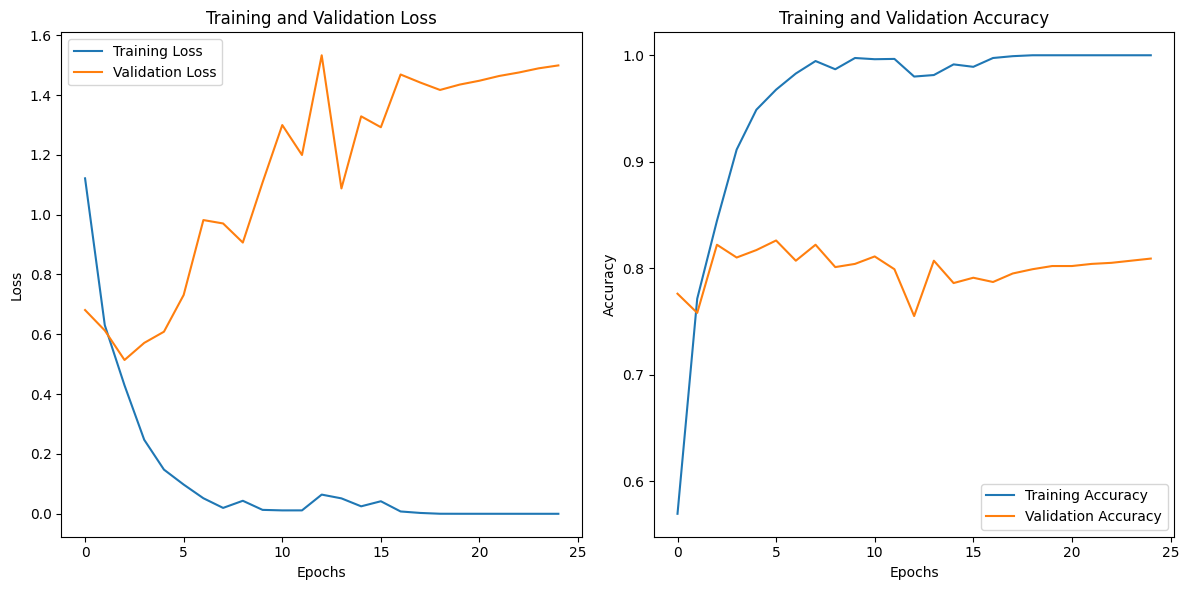

In [ ]:
# Vẽ biểu đồ huấn luyện
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Đánh giá mô hình trên tập test
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.3f}")

16/16 [==============================] - 4s 226ms/step - loss: 2.3218 - accuracy: 0.7450
Test accuracy: 0.745
